# Plumed Analysis Notebook

Using this notebook to visualize and analyze the output from the H-bond metadynamics simulations

In [1]:
import plumed
import signac
import matplotlib.pyplot as plt
import subprocess
import os
plt.rcParams.update({'font.size':9})

kt = 300 * 8.314462618 * 10 ** -3

## Check CV of finished simulations

Using signac we can access simulations that have finished running

In [4]:
# Funciton to plot H-bonds for individual directories
hide_plots = False

def plot_CV_hbonds(filename = "hbond_CV_plot.png", dpi=300):
    plt.figure(dpi=dpi)
    data = plumed.read_as_pandas("HBOND_SUMS")
    fig, ax = plt.subplots(4,1, figsize = [15,10])
    ax[0].plot(data.time/5, data.values[:,1])
    ax[0].set_ylabel("Hydrogen Bond 1")
    ax[1].plot(data.time/5, data.values[:,2])
    ax[1].set_ylabel("Hydrogen Bond 2")
    ax[2].plot(data.time/5, data.values[:,3])
    ax[2].set_ylabel("Hydrogen Bond 3")
    ax[3].plot(data.time/5, data.values[:,4])
    ax[3].set_ylabel("Sum of H-Bonds")
    ax[3].set_xlabel("Time (ns)")
    if hide_plots:
        plt.close()
    plt.savefig(filename)

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


<Figure size 1920x1440 with 0 Axes>

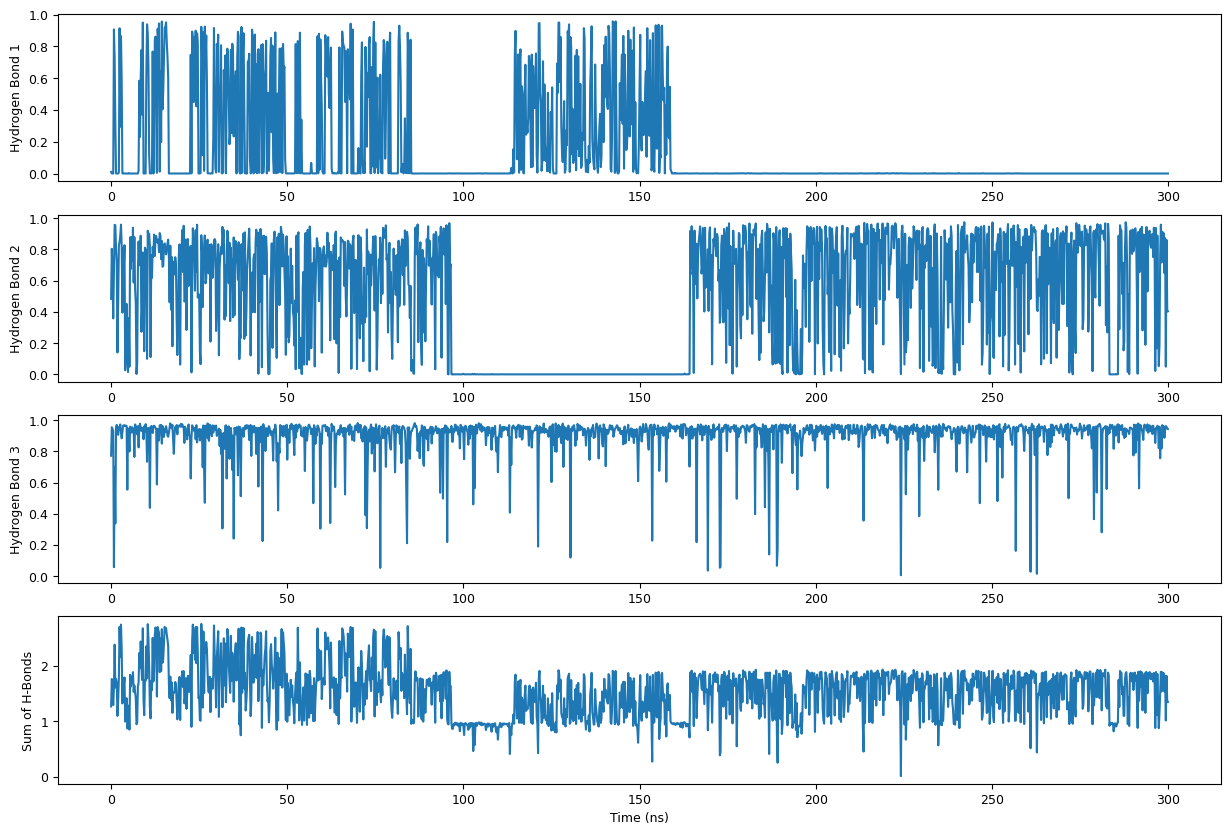

In [14]:
plot_CV_hbonds()

In [11]:
# Funciton to plot H-bonds for individual directories
hide_plots = False

def plot_CV_torsions(filename = "torsion_CV_plot.png", dpi=300):
    plt.figure(dpi=dpi)
    data = plumed.read_as_pandas("COLVAR_STD_TORSIONS")
    fig, ax = plt.subplots(6,1, figsize = [12,10])
    ax[0].plot(data.time/5, data.diff1)
    ax[0].set_ylabel("$\sigma_{A1}$")
    ax[1].plot(data.time/5, data.diff2)
    ax[1].set_ylabel("$\sigma_{A2}$")
    ax[2].plot(data.time/5, data.diff3)
    ax[2].set_ylabel("$\sigma_{P1}$")
    ax[3].plot(data.time/5, data.diff4)
    ax[3].set_ylabel("$\sigma_{P2}$")
    ax[4].plot(data.time/5, data.diff5)
    ax[4].set_ylabel("$\sigma_{P3}$")
    ax[5].plot(data.time/5, data.sumdiff)
    ax[5].set_ylabel("CV")
    ax[5].set_xlabel("Time (ns)")
    if hide_plots:
        plt.close()
    plt.savefig(filename)

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


<Figure size 1920x1440 with 0 Axes>

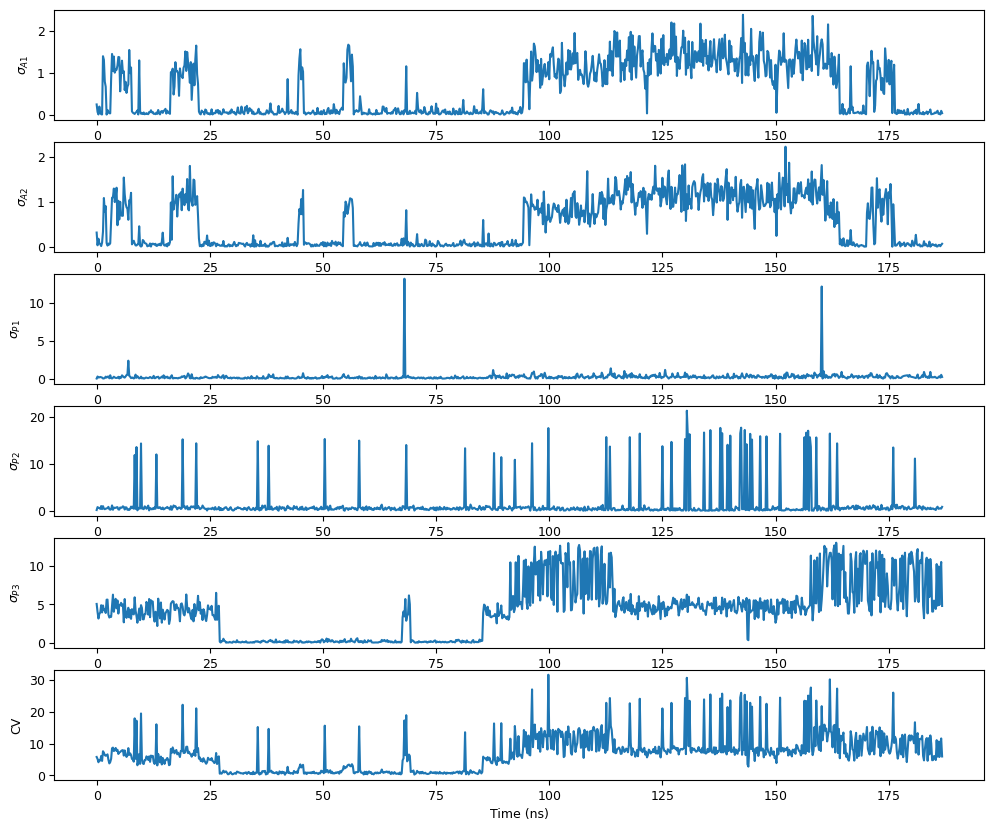

In [12]:
plot_CV_torsions()

In [6]:
data = plumed.read_as_pandas("COLVAR_STD_TORSIONS")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


In [7]:
data

,time,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t17,t18,t19,t20,diff1,diff2,diff3,diff4,diff5,sumdiff
0,0.0,-1.012266,-0.239543,-0.794946,0.490641,-1.510755,-0.640818,-0.935842,-0.698100,-2.351422,...,-2.920531,0.246569,0.311629,0.220648,0.899572,0.315761,0.025185,9.971148,5.059593,16.271259
1,1.0,-1.127712,-0.744227,-0.974741,0.505147,-1.070497,-0.776538,-0.921044,-1.010677,-1.651595,...,2.835904,0.327217,-0.143668,-0.083068,1.106804,0.032677,0.290585,8.862020,4.014250,14.306337
2,2.0,-0.810514,-0.930523,-0.924817,0.657491,-1.422413,-1.097681,-0.807747,-0.786257,-1.952199,...,2.872070,0.561851,0.427471,0.155956,1.201338,0.178244,0.159599,7.375589,3.157829,12.072599
3,3.0,-0.688367,-0.535290,-0.753446,0.619153,-1.320267,-0.941074,-0.874740,-1.007405,-1.618341,...,2.992279,0.375181,0.072539,0.331765,0.833606,0.077761,0.178777,7.675583,3.768848,12.534576
4,4.0,-0.998970,-0.720084,-0.663324,0.610350,-0.992565,-0.986281,-0.633183,-0.853416,-2.572806,...,2.981677,0.108005,0.363138,0.088663,1.029312,0.056565,0.234611,9.236528,3.937512,14.494528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,580.0,-0.895054,-1.985823,-0.734230,0.477753,-1.020639,-2.304168,-0.882032,-2.014486,-1.978581,...,-2.808233,0.044156,0.047424,0.190169,2.034140,1.007205,0.079448,5.928501,4.220504,13.269798
581,581.0,-0.819936,-2.038096,-1.271220,0.456442,-1.068889,-2.249901,-0.721428,-1.803905,-2.309445,...,-3.133251,0.332777,0.200407,0.060560,2.185391,0.960444,0.294065,6.236301,5.573041,15.249242
582,582.0,-0.953264,-2.043945,-0.858437,0.447259,-1.245677,-2.524218,-0.947703,-2.160676,-1.813317,...,-3.015872,0.635920,0.401193,0.190525,2.079402,1.108258,0.019783,4.421181,5.931794,13.560418
583,583.0,-0.887755,-1.445667,-1.038036,0.454938,-0.597376,-2.027752,-0.988212,-2.252629,-2.471620,...,-2.597786,0.376356,0.063319,0.131079,1.357352,1.278093,1.012551,6.111869,3.922742,13.682607
